                         Нижегородский  государственный  университет  им. Н.И. Лобачевского 
                                         Радиофизический  факультет 

                               Лабораторная  работа по программированию №5 
                                              
                                               Решение СЛУ 

                                                                                       Работу  выполнил:

                                                                                       студент  радиофизического  факультета

                                                                                       430 группы 

                                                                                       Сергеев  Егор
  
                                                                                       Преподаватель: 

                                                                                       Шиндин А.В.     


                                              Нижний Новгород, 2016 

###  Метод    Зейделя 
Метод Гаусса — Зейделя (метод Зейделя, процесс Либмана, метод последовательных замещений) — является классическим итерационным методом решения системы линейных уравнений. Назван в честь Зейделя и Гаусса.

Возьмём систему: $ A\vec{x}=\vec{b} $, где $ A=\left({\begin{array}{ccc}a_{11}&\ldots &a_{1n}\\\vdots &\ddots &\vdots \\a_{n1}&\ldots &a_{nn}\end{array}}\right), $
 $ {\vec {b}}=\left({\begin{array}{c}b_{1}\\\vdots \\b_{n}\end{array}}\right) $  .
 
 Или $ \left\{{\begin{array}{rcl}a_{11}x_{1}+\ldots +a_{1n}x_{n}&=&b_{1}\\&&\\a_{n1}x_{1}+\ldots +a_{nn}x_{n}&=&b_{n}\end{array}}\right.$.
 
 Чтобы пояснить суть метода, перепишем задачу в виде:
 
$ \left\{
\begin{array}{lcr}
a_{11}x_1 & = &-a_{12}x_2 - a_{13}x_3 -\ldots - a_{1n}x_n  +  b_1\\
a_{21}x_1 + a_{22}x_2 & = & -a_{23}x_3 - \ldots - a_{2n}x_n  +  b_2\\
\ldots & &\\
a_{(n-1)1}x_1 + a_{(n-1)2}x_2 +\ldots+ a_{(n-1)(n-1)}x_{n-1} & = & -a_{(n-1)n}x_n + b_{n-1}\\
a_{n1}x_1 + a_{n2}x_2 +\ldots+ a_{n(n-1)}x_{n-1}+ a_{nn}x_n & = & b_n
\end{array} \right. $

Здесь в $j$-м уравнении мы перенесли в правую часть все члены, содержащие $ x_{i} $ x_{i} , для $ i>j $ i>j. Эта запись может быть представлена:

$ (\mathrm {L} +\mathrm {D} ){\vec {x}}=-\mathrm {U} \,{\vec {x}}+{\vec {b}},$ 

где в принятых обозначениях $ \mathrm {D} $  означает матрицу, у которой на главной диагонали стоят соответствующие элементы матрицы $ A $ , а все остальные нули; тогда как матрицы $ \mathrm {U} $  и $ \mathrm {L} $  содержат верхнюю и нижнюю треугольные части $ A $  , на главной диагонали которых нули.

Итерационный процесс в методе Гаусса-Зейделя строится по формуле $ (\mathrm {L} +\mathrm {D} ){\vec {x}}^{(k+1)}=-\mathrm {U} {\vec {x}}^{(k)}+{\vec {b}},\quad k=0,1,2,\ldots $  после выбора соответствующего начального приближения $ {\vec {x}}^{(0)} $ 

Метод Гаусса-Зейделя можно рассматривать как модификацию метода Якоби. Основная идея модификации состоит в том, что новые значения $ {\vec {x}}^{(i)}$  используются здесь сразу же по мере получения, в то время как в методе Якоби они не используются до следующей итерации:

$ \left\{{\begin{array}{ccccccccccc}{x_{1}}^{(k+1)}&=&c_{12}{x_{2}^{(k)}}&+&c_{13}x_{3}^{(k)}&+&{\ldots }&+&c_{1n}{x_{n}}^{(k)}&+&d_{1}\\{x_{2}}^{(k+1)}&=&c_{21}{x_{1}^{(k+1)}}&+&c_{23}x_{3}^{(k)}&+&{\ldots }&+&c_{2n}{x_{n}}^{(k)}&+&d_{2}\\\ldots &&&&&&&&&&\\{x_{n}}^{(k+1)}&=&c_{n1}{x_{1}^{(k+1)}}&+&c_{n2}{x_{2}^{(k+1)}}&+&{\ldots }&+&c_{n(n-1)}{x_{n-1}}^{(k+1)}&+&d_{n}\end{array}}\right., $ 

где $  c_{ij}={\begin{cases}-{\frac {a_{ij}}{a_{ii}}},&j\neq i,\\0,&j=i.\end{cases}}\quad d_{i}={\frac {b_{i}}{a_{ii}}},\quad i=1,\ldots ,n $ 

Таким образом, i-тая компонента $ (k+1) $-го приближения вычисляется по формуле:

$ x_{i}^{(k+1)}=\sum _{j=1}^{i-1}c_{ij}x_{j}^{(k+1)}+\sum _{j=i}^{n}c_{ij}x_{j}^{(k)}+d_{i},\quad i=1,\ldots ,n $ 

## Задание:
Решить для 10000 методом Зейделя систему уравнений с относительной точностью 0.001.
Для вычисления интеграла использовать реккурентную формулу Симпсона. 
$$ \displaystyle \sum_{i=1}^n(i/(i^2+1)) * i *  sin(i)x_{i}  + \displaystyle \int _{0}^{inf}sin(t)*exp(-i*t)\,dt$$

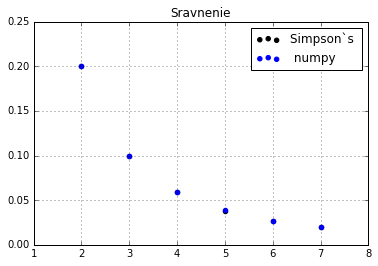

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import log, trapz, linspace, nan, sin, exp
plt.grid(True)
def f(t, i):
    return sin(t)*exp(-i*t)
#Разбиение
def T(n, k):
    b=10
    a=0
    T0=(b-a)/2*(f(a, k)+f(b, k))
    s=0
    Tn=0
    for p in range(1, n):
        x=[]
        h=(b-a)/2**p
        r=0
        i=0
        while r<b:
            r=a+i*h
            i+=1
            x.append(r)
        for y in range(1, 2**(p-1)):
            s+=f(x[2*y-1], k)
        Tn=T0/2+h/2*s
        T0=Tn
    return Tn
#Формула Симпсона
def J(j):
    b=10
    a=0
    e=0.01
    J0=0
    J1=0
    l=2
    ki=10
    while ki>e:
        J1=(4*T(l+1, j)-T((l), j))/3
        ki=abs(J0-J1)/abs(J1)
        l+=2
        J0=J1
    return J0
#Сравнение 
F=0
F0=0
v=linspace(2, 7, 6)
x=linspace(0, 10, 1000)
F0=[trapz(f(x, y), x) for y in v]
F=[J(z) for z in v]
plt.title('Sravnenie')
plt.scatter(v, F, label= u'Simpson`s ', color='black')
plt.scatter(v, F0, label= u' numpy', color='blue')
plt.legend()
plt.show()

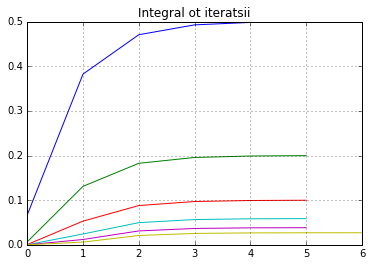

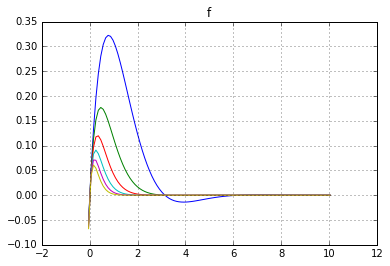

In [5]:
%matplotlib inline
from numpy import zeros, log, sin, cos, sqrt, linspace
from numpy.linalg import solve, norm
import matplotlib.pyplot as plt
def f(t, i):
    return sin(t)*exp(-i*t)
#Разбиение 
def T(n, k):
    b=10
    a=0
    T0=(b-a)/2*(f(a, k)+f(b, k))
    s=0
    Tn=0
    for p in range(1, n):
        x=[]
        h=(b-a)/2**p
        r=0
        i=0
        while r<b:
            r=a+i*h
            i+=1
            x.append(r)
        for y in range(1, 2**(p-1)+1):
            s+=f(x[2*y-1], k)
        Tn=T0/2+h/2*s
        T0=Tn
    return Tn  
plt.title('Integral ot iteratsii')
plt.grid(True)
for j in range(1, 7):
    JJ=[]
    b=10
    a=0
    e=0.01
    J0=0
    J1=0
    l=2
    ki=10
    while ki>e:
        J1=(4*T(l+1, j)-T((l), j))/3
        ki=abs(J0-J1)/abs(J1)
        l+=2
        J0=J1
        JJ.append(J0)
    plt.plot(JJ, )

plt.show()
plt.grid(True)
plt.title('f')    
for t in range(1, 7):
    p=linspace(-0.05, b+0.05, 100)
    u=f(p, t)
    plt.plot(p, u)
plt.show()

n=  100
Метод Зейделя (шаги):  3


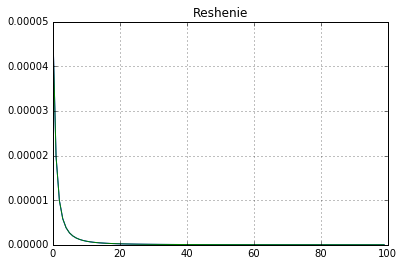

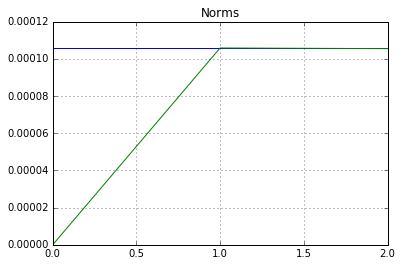

In [8]:
%matplotlib inline
from numpy import zeros, log, sin, cos, sqrt, linspace, nan, set_printoptions
from numpy.linalg import solve, norm
import matplotlib.pyplot as plt
set_printoptions(threshold=nan)
def f(t, i):
    return sin(t)*exp(-i*t)
#Разбиение 
def T(n, k):
    b=6
    a=0
    T0=(b-a)/2*(f(a, k)+f(b, k))
    s=0
    Tn=0
    for p in range(1, n):
        x=[]
        h=(b-a)/2**p
        r=0
        i=0
        while r<b:
            r=a+i*h
            i+=1
            x.append(r)
        for y in range(1, 2**(p-1)):
            s+=f(x[2*y-1], k)
        Tn=T0/2+h/2*s
        T0=Tn
    return Tn
#Формула Симпсона
def J(j):
    b=6
    a=0
    e=0.01
    J0=0
    J1=0
    l=2
    ki=10
    while ki>e:
        J1=(4*T(l+1, j)-T((l), j))/3
        ki=abs(J0-J1)/abs(J1)
        l+=1
        J0=J1
    return J0


n=100
b=[]
a=zeros((n,n))


for i in range(1, n+1):
    b.append((-J(i)))


for i in range(0, n):
    for j in range(0, n):
            if i==j:
                a[i][j]=1/(1+i**2)*j*sin(j)-n**2
            else:
                a[i][j]=1/(1+i**2)*j*sin(j)

xx=solve(a, b)
if n<=20:
    print('Решение встроеной функцией')
    print(xx)

eps=0.001
kj=99999
l=1
x=zeros((n, 1))
norma=[]
ol=[]
while kj>eps:
    x1=zeros((n,1))
    k1=0
    k0=0
    for i in range(0, n):
        v=0
        z=0
        for j in range(0, n):
            if a[i][j]!=0:
                v+=a[i][j]*x[i]
        for g in range(0, i-1):
            if a[i][g]!=0:
                z+=a[i][g]*x1[g]
        x1[i]=x[i]-(v+z-b[i])/a[i][i]
    kj=(norm((x-x1), 1))/norm(x1, 1)
    norma.append(norm(x,1))
    ol.append(norm(xx, 1))
    x=x1
    l+=1

x.shape = (1, n)
print('n= ', n)
print('Метод Зейделя (шаги): ', l-1)
if n<=20:
    print(x)

x.shape = (n, 1)
plt.plot(xx, )
plt.plot(x, )
plt.grid(True)
plt.title('Reshenie')
plt.show()


plt.grid(True)
plt.title('Norms')
plt.plot(ol)
plt.plot(norma)
plt.show()